In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [92]:
iris = load_iris()

data = np.column_stack([iris['data'], iris['target'] == 0, iris['target'] == 1, iris['target'] == 2 ])
data

array([[5.1, 3.5, 1.4, ..., 1. , 0. , 0. ],
       [4.9, 3. , 1.4, ..., 1. , 0. , 0. ],
       [4.7, 3.2, 1.3, ..., 1. , 0. , 0. ],
       ...,
       [6.5, 3. , 5.2, ..., 0. , 0. , 1. ],
       [6.2, 3.4, 5.4, ..., 0. , 0. , 1. ],
       [5.9, 3. , 5.1, ..., 0. , 0. , 1. ]])

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

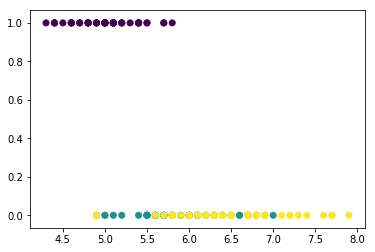

In [95]:
# Initially we will make a prediction using only 2 columns

data = np.column_stack([data[:,0], data[:,2], data[:,-3:]])
plt.scatter(data[:,0], data[:,1], c=iris['target'])

In [68]:
f  = np.vectorize(lambda x: 1 / (1 + np.exp(-x)))
df = np.vectorize(lambda x: f(x) * (1 - f(x)))

net = lambda w, x, theta: w.dot(x) + theta

class MLP:
    def __init__(self, inputLayer=2, hiddenLayer=3, outputLayer=3):
        self.inputLayer = inputLayer
        self.hiddenLayer = hiddenLayer
        self.outputLayer = outputLayer
        
        # Theta vector
        self.theta_h = np.random.uniform(low=-0.5, high=0.5, size=hiddenLayer)
        self.theta_o = np.random.uniform(low=-0.5, high=0.5, size=outputLayer)
        
        # Weights arrays
        self.weight_h = np.random.uniform(
                low=-0.5, high=0.5, size=inputLayer*hiddenLayer
            ).reshape(hiddenLayer, inputLayer)
        self.weight_o = np.random.uniform(
                low=-0.5, high=0.5, size=hiddenLayer*outputLayer
            ).reshape(outputLayer, hiddenLayer)

    def forward(self, query):
        
        # First we calculate f(net) of the hidden layer
        hidden = np.zeros(self.hiddenLayer)
        for i in range(self.hiddenLayer):
            hidden[i] = f(net(self.weight_h[i], query, self.theta_h[i]))
        
        # Then we calculate net of the output layer
        output = np.zeros(self. outputLayer)
        for i in range(self.outputLayer):
            output[i] = f(net(self.weight_o[i], hidden, self.theta_o[i]))
        
        return output
    
    def backward(self, dataset, eta=0.5, maxIter=10**2):
        
        for i in range(maxIter):
            for query in dataset:
                # First we calculate net of the hidden layer            
                hidden_net = np.zeros(self.hiddenLayer)
                for i in range(self.hiddenLayer):
                    hidden_net[i] = net(self.weight_h[i], query[:-3+i], self.theta_h[i])

                # Then f(net) of hidden layer
                hidden_fnet = f(hidden_net)

                # Then we calculate net of the output layer
                output_net = np.zeros(self. outputLayer)
                for i in range(self.outputLayer):
                    output_net[i] = net(self.weight_o[i], hidden_fnet, self.theta_o[i])

                # Then f(net) of output layer
                output_fnet = f(output_net)

                # We calculate the error made
                
                
                # We update the weight k,j of the output layer
                for k in range(self.outputLayer):
                    for j in range(self.hiddenLayer):
                        self.weight_o[k][j] = self.weight_o[k][j] \
                                - eta * (-2 * (query[-1] - output_fnet[k])) \
                                * df(output_fnet[k]) * hidden_fnet[j]
                
                # Then the output thetas
                for k in range(self.outputLayer):
                    self.theta_o[k] = self.theta_o[k] \
                                - eta * (-2 * (query[-1] - output_fnet[k])) \
                                * df(output_fnet[k])
                
                # Then the weight i,j of the hidden layer
                for j in range(self.hiddenLayer):
                    for i in range(self.inputLayer):
                        summ = np.zeros(self.outputLayer)
                        for k in range(self.outputLayer):
                            summ[i] = (query[-1] - output_fnet[k]) * df(output_fnet[k]) \
                                * self.weight_o[k][j] * df(hidden_net[j]) * query[i]
                        
                        self.weight_h[j][i] = self.weight_h[j][i] + eta * (-2 * np.sum(summ))
                
                # Then theta of the hidden layer
                for j in range(self.hiddenLayer):
                    summ = np.zeros(self.outputLayer)
                    for k in range(self.outputLayer):
                        summ[i] = (query[-1] - output_fnet[k]) * df(output_fnet[k]) \
                            * self.weight_o[k][j] * df(hidden_net[j])

                    self.weight_h[j][i] = self.weight_h[j][i] + eta * (-2 * np.sum(summ))
        
mlp = MLP()
mlp.backward(data)
mlp.forward(np.array([4.5, 1.5]))

array([0.99999995, 0.99999995, 0.99999995])